In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
import albumentations as A
from skimage import io
import random


In [3]:
input_path_img = "dataset/2d_slices/pre_processed_images"
input_path_masks = "dataset/2d_slices/masks"
output_path_images = "dataset/2d_slices/aug_imgs/"
output_path_masks = "dataset/2d_slices/aug_masks/"

if not os.path.isdir(output_path_images):
    os.makedirs(output_path_images)
if not os.path.isdir(output_path_masks):
    os.makedirs(output_path_masks)

In [4]:
images=[] #to store paths of images from folder
masks=[]

for img in os.listdir(input_path_img):
    images.append(os.path.join(input_path_img,img))

for mask in os.listdir(input_path_masks):
    masks.append(os.path.join(input_path_masks,mask))


In [5]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image,cmap=plt.cm.bone)
        ax[1].imshow(mask,cmap=plt.cm.bone)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image, cmap=plt.cm.bone)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask,cmap=plt.cm.bone)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image,cmap=plt.cm.bone)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask,cmap=plt.cm.bone)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [6]:
aug = A.Compose([
    A.GaussianBlur(p=0.3,blur_limit=(1,3)), #Blur the input image using a Gaussian filter with a random kernel size.
     A.Sharpen(p=0.3,alpha=(0.1,0.5),lightness=(0.0,0.0)), 
    A.ElasticTransform(p=0.2, alpha=1, sigma=25.0, alpha_affine=10, interpolation=3, border_mode=0, value=(0, 0, 0), mask_value=None, approximate=False, same_dxdy=False),
    A.GaussNoise(p=0.3),
    A.GridDistortion(p=0.2, num_steps=1, distort_limit=(-0.15, 0.15), interpolation=3, border_mode=0, value=(0, 0, 0), mask_value=None, normalized=False),
    A.HorizontalFlip(p=0.2),
    A.OpticalDistortion(p=0.2, distort_limit=(-0.2, 0.2), shift_limit=(-0.15, 0.15), interpolation=0, border_mode=0, value=(0, 0, 0), mask_value=None),
    A.RandomBrightness(p=0.2),
    A.ShiftScaleRotate(p=0.33, shift_limit_x=(-0.05, 0.05), shift_limit_y=(-0.05, 0.05), scale_limit=(-0.2, 0.2), rotate_limit=(-5, 5), interpolation=3, border_mode=2, value=(0, 0, 0), mask_value=None, rotate_method='largest_box')
    ]
)

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\albumentations\augmentations\transforms.py:1151: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,


In [7]:
images_to_generate = 15000
i = 1
while i<=images_to_generate:
    number = random.randint(0,len(images)-1)
    image = images[number]
    mask = masks[number]
    original_image = np.load(image)
    original_image = original_image.astype(np.uint8)
    original_mask = np.load(mask)
    augmented = aug(image = original_image, mask = original_mask)
    transformed_image = augmented["image"]
    transformed_mask = augmented["mask"]
    img_name = os.path.split(image)[1]
    img_name = "augmented_"+str(i)+"_"+str(img_name)
    mask_name = os.path.split(mask)[1]
    mask_name = "augmented_"+str(i)+"_"+str(mask_name)
    np.save(os.path.join(output_path_images,img_name), transformed_image)
    np.save(os.path.join(output_path_masks, mask_name), transformed_mask)
    i=i+1

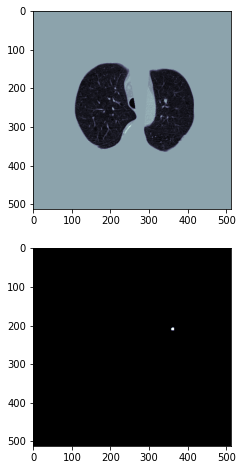

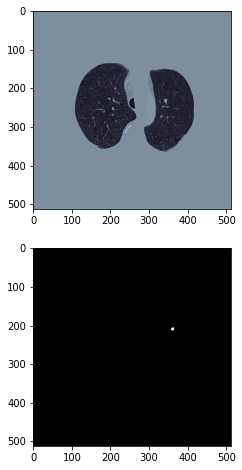

In [10]:
#Just for visualization of augmented images
number = random.randint(0,len(images)-1)
image = images[number]
mask = masks[number]
original_image = np.load(image)
original_image = original_image.astype(np.uint8)
original_mask = np.load(mask)
augmented = aug(image = original_image, mask = original_mask)
transformed_image = augmented["image"]
transformed_mask = augmented["mask"]
visualize(original_image,original_mask)
visualize(transformed_image,transformed_mask) 